<a href="https://colab.research.google.com/github/Aishu-5/CVIP-DataScienceIntern-Phase2/blob/main/Email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Import the necessary libraries**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
import warnings
warnings.filterwarnings("ignore")

 **Read the dataset using the read_csv**

In [30]:
df=pd.read_csv("/content/emails.csv")

**Head of the dataset**

In [31]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


**Description of the dataset**

In [32]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


**Analysing the data types of the columns**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


**Shape of the dataset**

In [34]:
df.shape

(5172, 3002)

**Tail of the dataset**

In [35]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


**Checking the null values**

In [36]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

**Heatmap**

<Axes: >

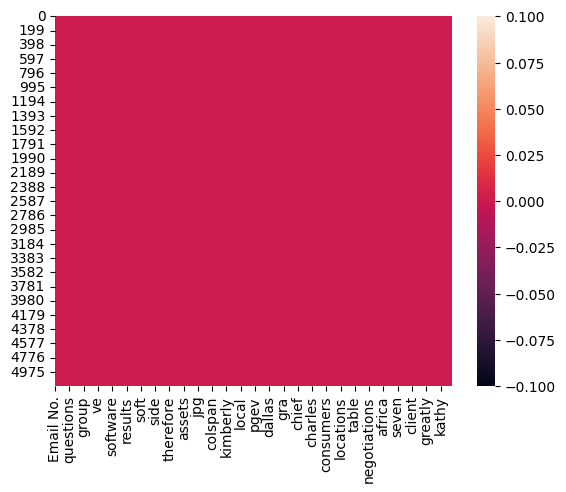

In [37]:
sns.heatmap(df.isnull())

In [38]:
df = df.iloc[:, 1:]
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [39]:
df.nunique()

the           90
to            72
ect           90
and           53
for           42
              ..
military       4
allowing       3
ff            23
dry            4
Prediction     2
Length: 3001, dtype: int64

**Distplot**

<Axes: xlabel='Prediction', ylabel='Density'>

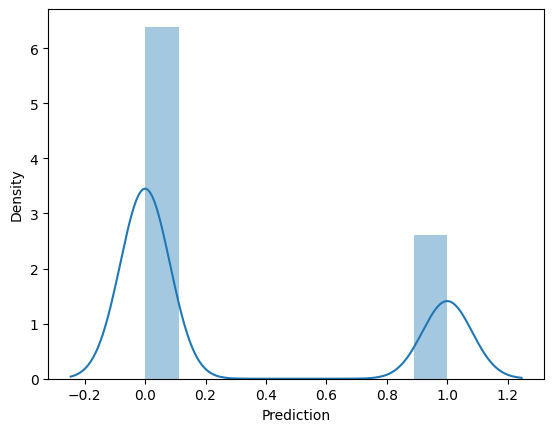

In [40]:
sns.distplot(df.Prediction)

**Separating X and Y data**

In [41]:
x = df.iloc[:, :3000].values
x

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]])

In [42]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 1, 0])

**Splitting the data into training and testing data**

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

**Function to Measure Performance & Show Confusion Matrix**

In [44]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")

    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()

**Gaussian Naive Bayes**

Precision :  0.9079497907949791
Recall :  0.9559471365638766
Accuracy Score :  0.9587628865979382
F1 Score :  0.9313304721030043

 [[1054   44]
 [  20  434]]



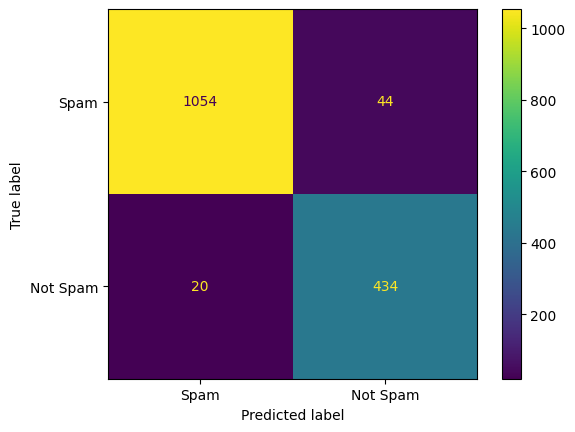

In [45]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
y_pred_nb = model_nb.predict(x_test)
perform(y_pred_nb)

**Multinomial Naive Bayes**

Precision :  0.8732394366197183
Recall :  0.9559471365638766
Accuracy Score :  0.946520618556701
F1 Score :  0.9127234490010515

 [[1035   63]
 [  20  434]]



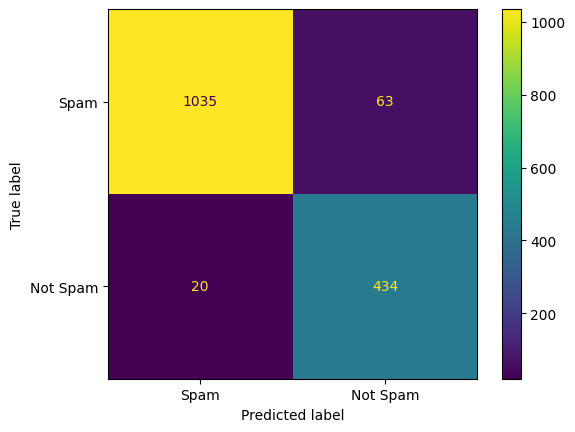

In [46]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)
y_pred_mnb = model_mnb.predict(x_test)
perform(y_pred_mnb)

**XGBoost Classifier**

Precision :  0.960352422907489
Recall :  0.960352422907489
Accuracy Score :  0.9768041237113402
F1 Score :  0.960352422907489

 [[1080   18]
 [  18  436]]



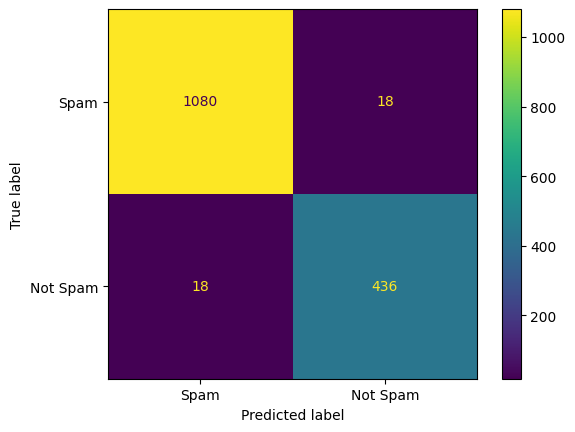

In [47]:
xgb = XGBClassifier().fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
perform(y_pred_xgb)

**Decision Tree**

Precision :  0.89086859688196
Recall :  0.8810572687224669
Accuracy Score :  0.9336340206185567
F1 Score :  0.8859357696567

 [[1049   49]
 [  54  400]]



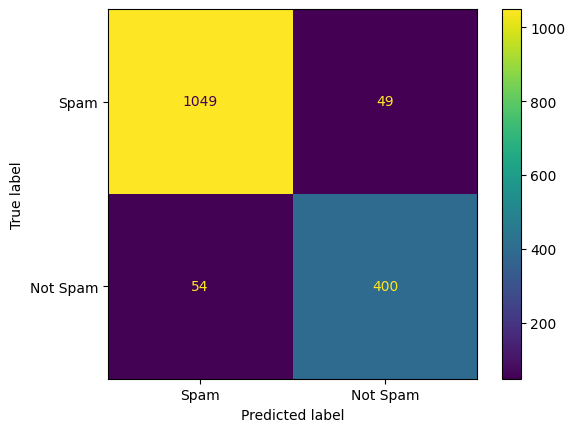

In [48]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
perform(y_pred_dt)

**Decision Tree Visualization**

In [49]:
feature_names = df.columns[0:3000]
viz = df.copy()
viz["Prediction"]=viz["Prediction"].values.astype(str)
print(viz.dtypes)
target_names = viz['Prediction'].unique().tolist()

the            int64
to             int64
ect            int64
and            int64
for            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction    object
Length: 3001, dtype: object


[Text(0.8221716168283046, 0.9814814814814815, 'enron <= 0.5\ngini = 0.411\nsamples = 3620\nvalue = [2574, 1046]\nclass = 0'),
 Text(0.8145087815792624, 0.9444444444444444, 'ali <= 0.5\ngini = 0.481\nsamples = 2594\nvalue = [1548, 1046]\nclass = 0'),
 Text(0.6893623907447318, 0.9074074074074074, 'http <= 0.5\ngini = 0.425\nsamples = 2104\nvalue = [1460, 644]\nclass = 0'),
 Text(0.6124412565852491, 0.8703703703703703, 'nom <= 0.5\ngini = 0.371\nsamples = 1877\nvalue = [1415, 462]\nclass = 0'),
 Text(0.5543844288793104, 0.8333333333333334, 'hanks <= 0.5\ngini = 0.443\nsamples = 1347\nvalue = [900, 447]\nclass = 0'),
 Text(0.5072362907088123, 0.7962962962962963, 'meter <= 0.5\ngini = 0.494\nsamples = 983\nvalue = [545, 438]\nclass = 0'),
 Text(0.45891702586206895, 0.7592592592592593, 'attached <= 0.5\ngini = 0.5\nsamples = 856\nvalue = [421, 435]\nclass = 1'),
 Text(0.4005926724137931, 0.7222222222222222, 'daren <= 0.5\ngini = 0.495\nsamples = 784\nvalue = [352, 432]\nclass = 1'),
 Text(0.

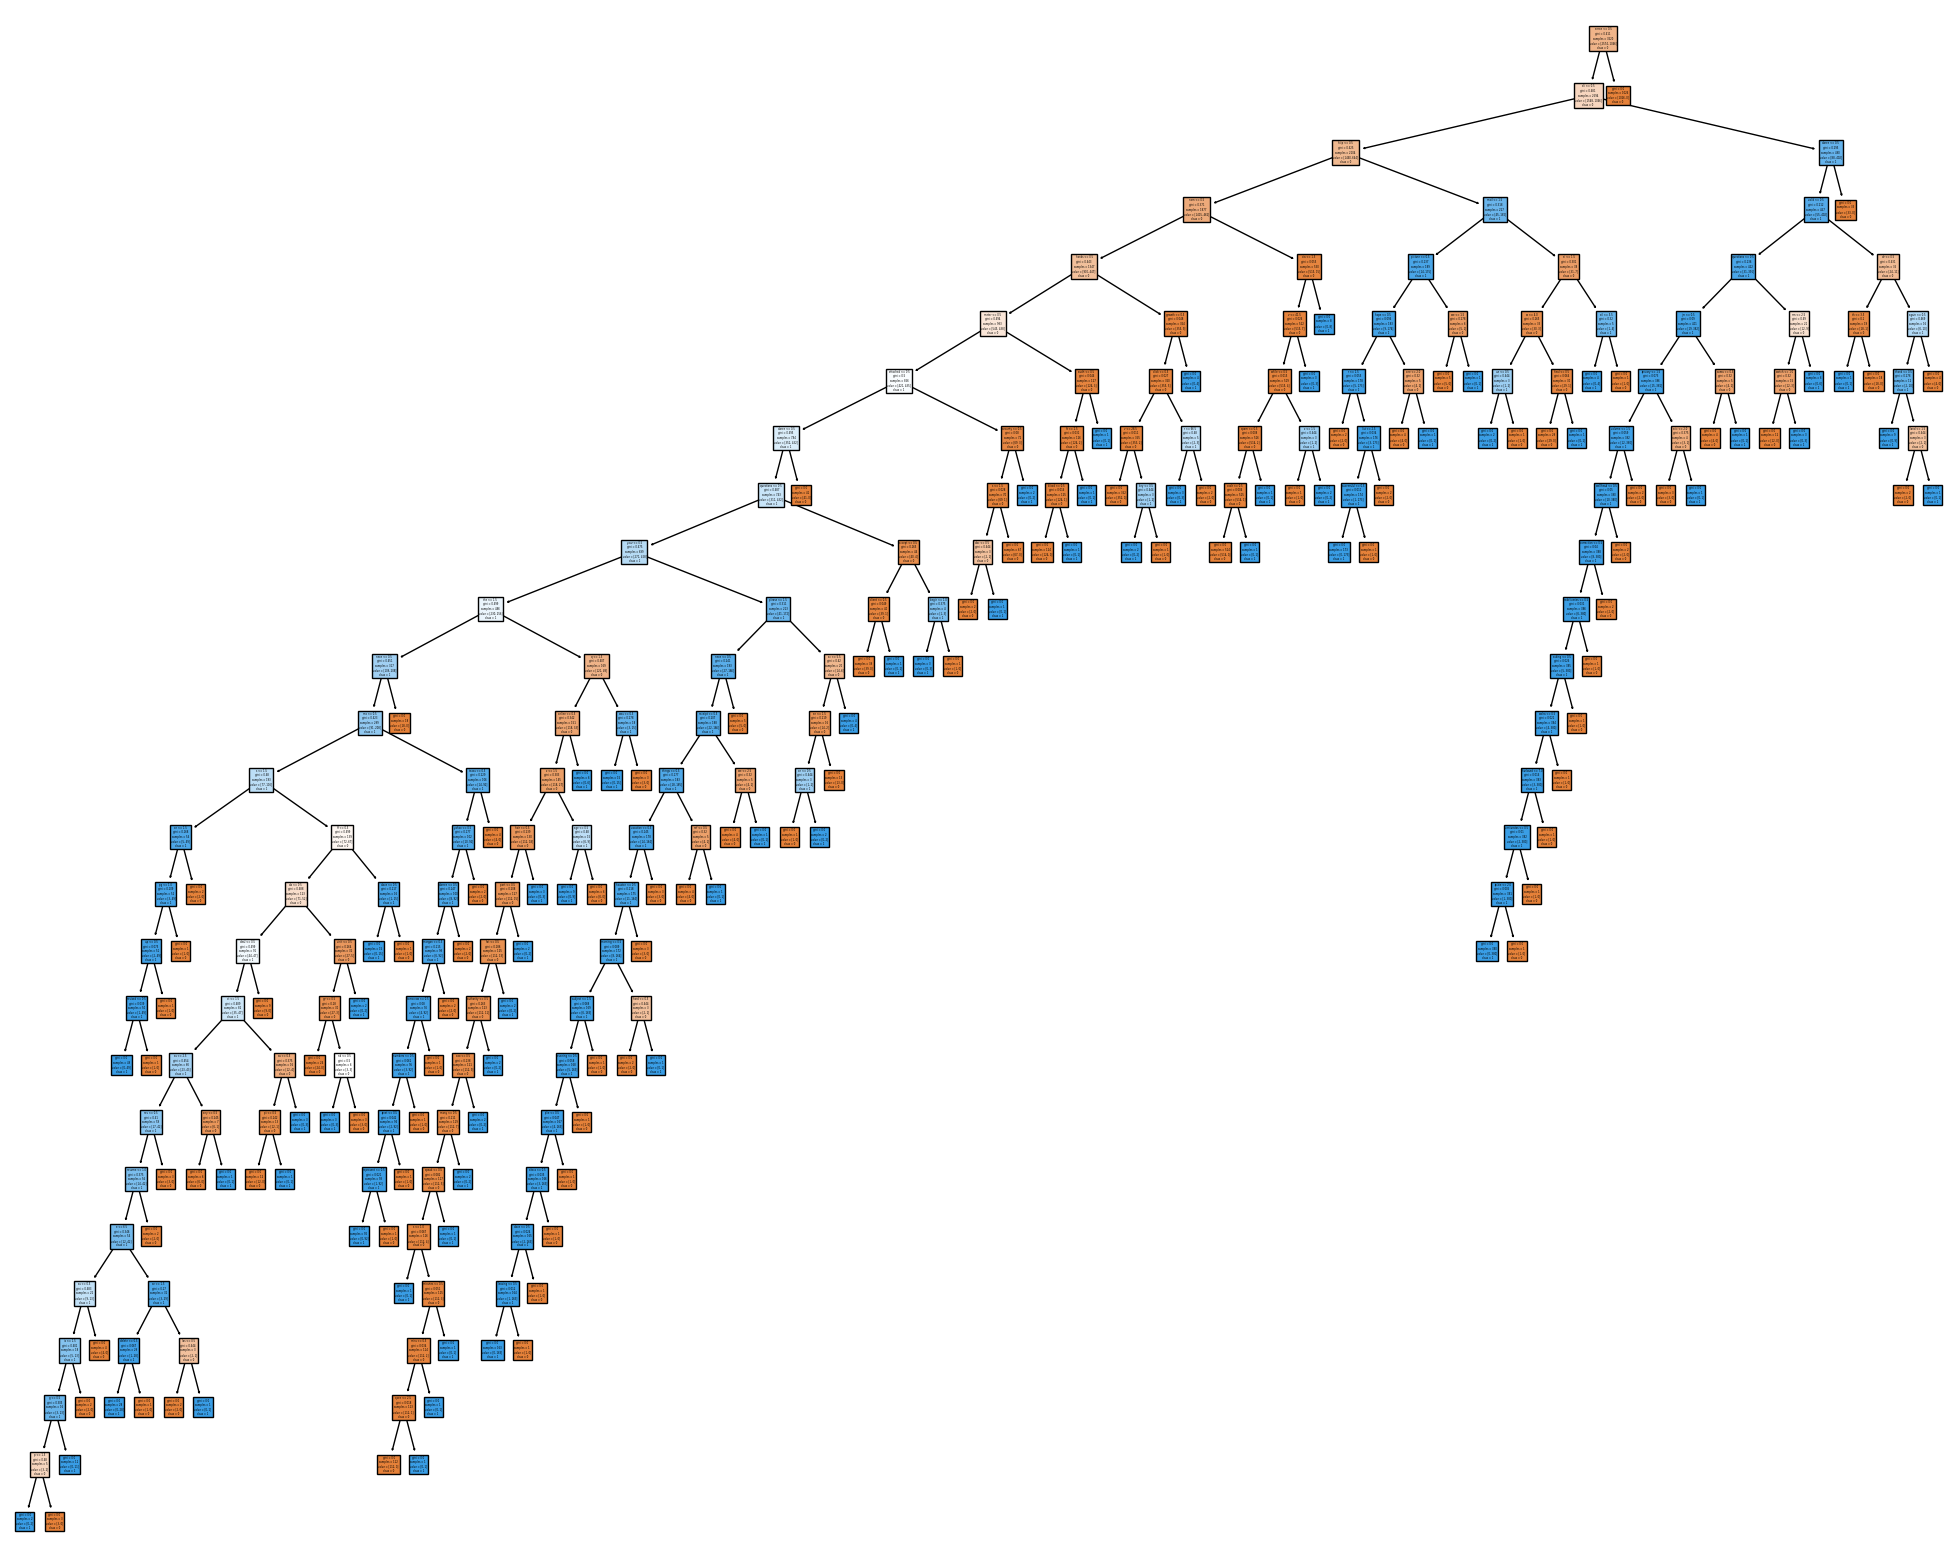

In [50]:
from sklearn.tree import plot_tree # tree diagram
plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

**Random Forest**

Precision :  0.9796839729119639
Recall :  0.9559471365638766
Accuracy Score :  0.9813144329896907
F1 Score :  0.967670011148272

 [[1089    9]
 [  20  434]]



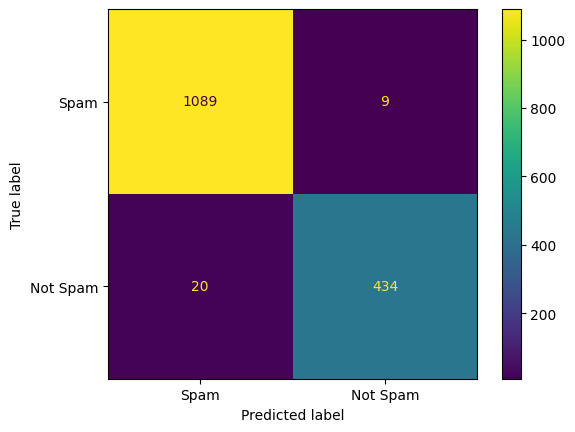

In [51]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
perform(y_pred_rf)

**Logistic Regression**

Precision :  0.9488888888888889
Recall :  0.9405286343612335
Accuracy Score :  0.9677835051546392
F1 Score :  0.9446902654867257

 [[1075   23]
 [  27  427]]



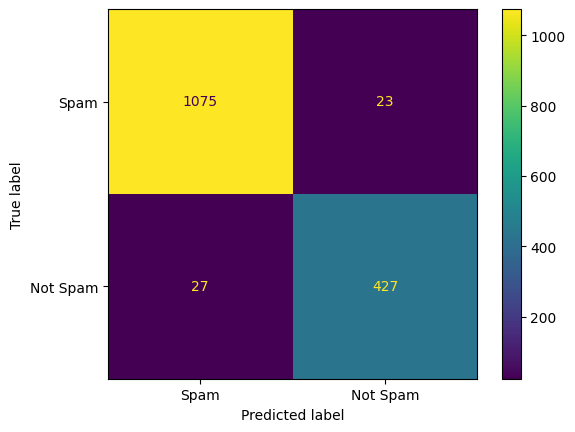

In [52]:
model_lr = LogisticRegression(max_iter = 700)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
perform(y_pred_lr)

**Support Vector Clasifier**

Precision :  0.8541666666666666
Recall :  0.36123348017621143
Accuracy Score :  0.7951030927835051
F1 Score :  0.5077399380804953

 [[1070   28]
 [ 290  164]]



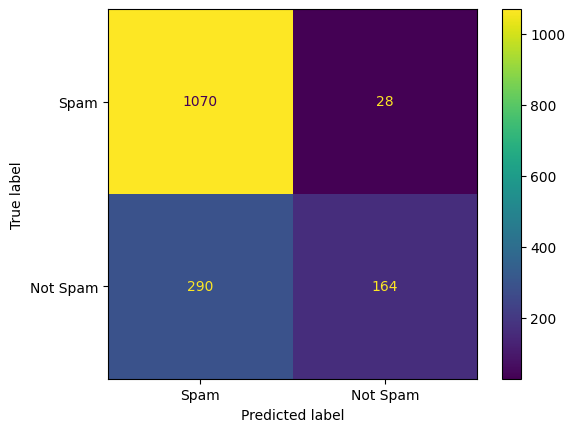

In [53]:
model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
perform(y_pred_svc)

**Precision-Recall Curve**

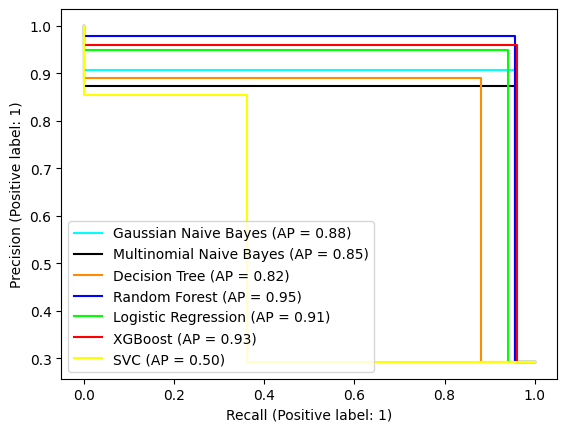

In [54]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, name=f"Gaussian Naive Bayes", color="cyan", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="darkorange", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="blue", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="lime", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost", color="red", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, name=f"SVC", color="yellow", ax=ax)

**ROC Curve**

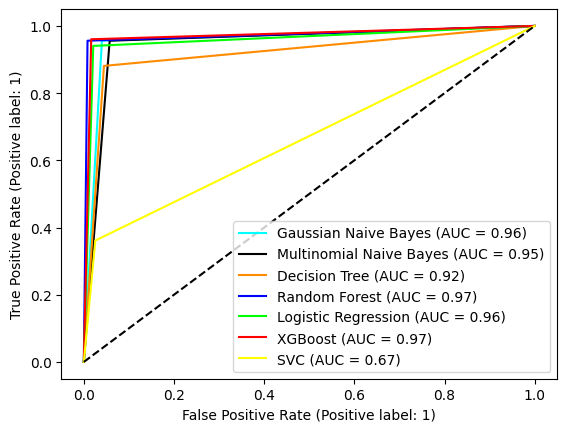

In [56]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_pred_nb, name=f"Gaussian Naive Bayes", color="cyan", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="darkorange", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="blue", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="lime", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost", color="red", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_svc, name=f"SVC", color="yellow", ax=ax)
plt.plot([0, 1], [0, 1], color="black", linestyle="--")